In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df= pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [4]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [5]:
df.shape

(246, 14)

In [6]:
df['Classes  '].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       nan, 'Classes  ', 'not fire     ', 'not fire    '], dtype=object)

In [7]:
##insights:- doest not have even space

In [8]:
df[df.isnull()].count()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [9]:
subset_index=df[df.isnull().any(axis=1)].index

In [10]:
#hence divide the dataset in twu subset
list=[]
j=0
for i in subset_index:
    
    list.append(df.iloc[j:i-1])
    j=i+1


In [11]:
len(list) #means there is two dataset
df1=pd.DataFrame(list[0])
df2=pd.DataFrame(list[1])

In [12]:
#add new colun with name of region
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [13]:
# Remove null or na values rows
df =df.dropna().reset_index(drop=True) 
df.shape

(244, 15)

In [14]:
# Column which has string
df.iloc[[122]]
#df.shape

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [15]:
#drop dataframe which has dtring
df=df.drop(122).reset_index()

In [16]:
df.tail()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
239,240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
240,241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2
242,243,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,2


In [17]:
df.shape

(243, 16)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        243 non-null    int64 
 1   day          243 non-null    object
 2   month        243 non-null    object
 3   year         243 non-null    object
 4   Temperature  243 non-null    object
 5    RH          243 non-null    object
 6    Ws          243 non-null    object
 7   Rain         243 non-null    object
 8   FFMC         243 non-null    object
 9   DMC          243 non-null    object
 10  DC           243 non-null    object
 11  ISI          243 non-null    object
 12  BUI          243 non-null    object
 13  FWI          243 non-null    object
 14  Classes      243 non-null    object
 15  Region       243 non-null    int64 
dtypes: int64(2), object(14)
memory usage: 30.5+ KB


In [19]:
#Some column names were misspaced so we can fix it
df.columns=df.columns.str.strip()
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [20]:
#Changing the required columns as integer data type
df[['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [21]:
objects = [features for features in df.columns if df[features].dtypes=='O']
for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype(float)

In [22]:
df.dtypes

index            int64
day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,243.0,121.497942,70.726594,0.0,60.50,121.0,182.50,243.0
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9


In [24]:
#null
#duplicates
#separating two subset
#changing data type
#mispaced columns
#removing uneven space
#balanced dataset or not

In [25]:
df["Classes"].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [26]:
df["Classes"]=df["Classes"].str.strip()

In [27]:
df.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [28]:
df.to_csv('Algerian_forest_fires_dataset_CLEANED.csv', index=False)
#insights= cleaned dataet

## EDA


In [29]:
#dropping feature day month year
df_feat=df.drop(["day",'month',"year","index"],axis=1)

In [30]:
df_feat

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [31]:
#encoding
df['Classes']=np.where(df['Classes']=='not fire',0,1)

In [32]:
df['Classes'].astype(int)

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int64

# visulaisation of distribution

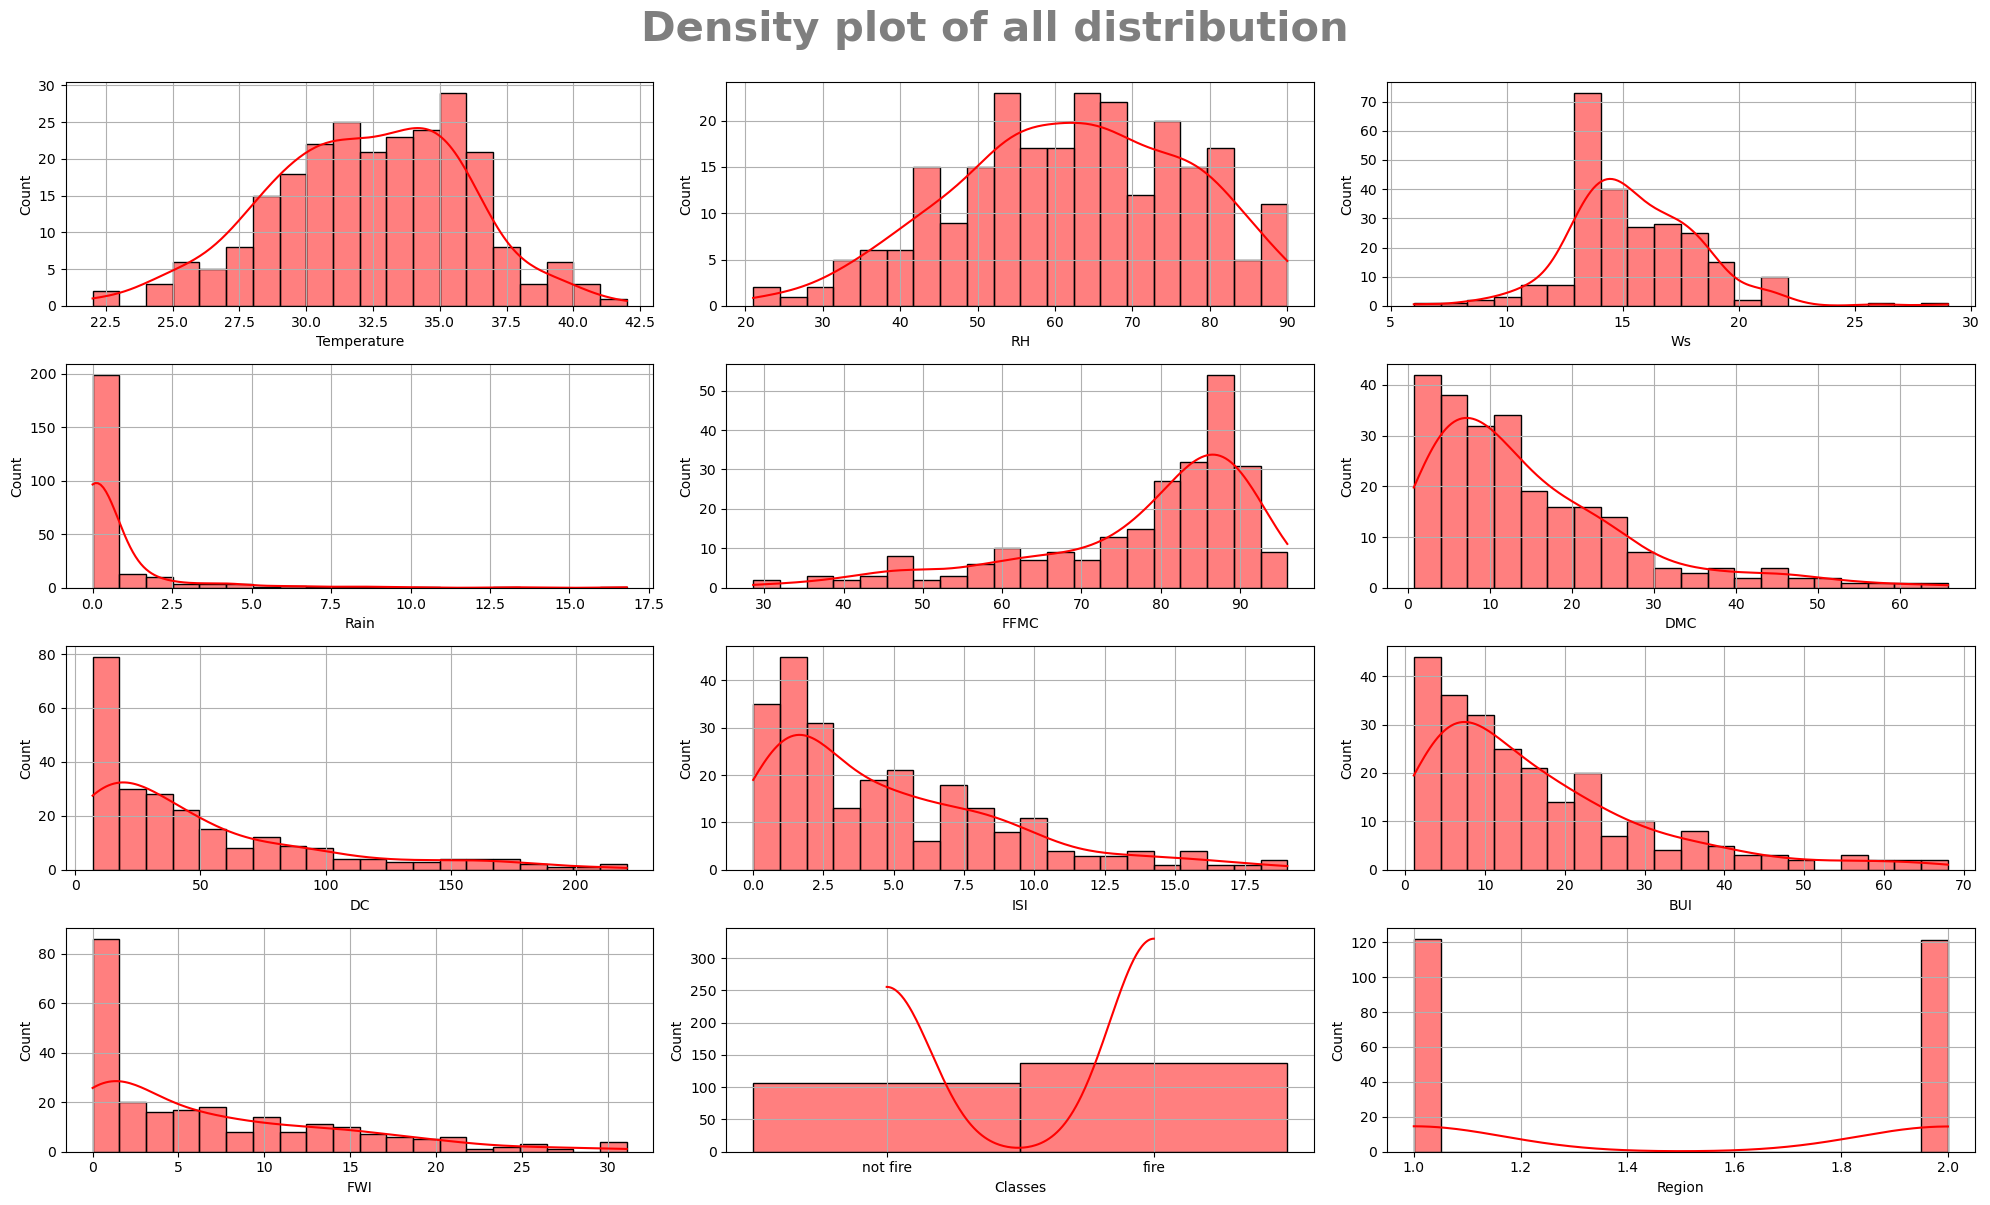

In [33]:
#plot density of all features(distrn)
plt.figure(figsize=(20,12),edgecolor="blue")
plt.suptitle("Density plot of all distribution",fontsize=30,fontweight="bold",alpha=0.5,y=1)
for i in range(0,len(df_feat.columns)):
    plt.subplot(4,3,i+1)
    sns.histplot(data=df_feat,x=df_feat.columns[i],bins=20,kde=True,color='red')
    plt.tight_layout()
    plt.grid()

In [34]:
percentage=df_feat['Classes'].value_counts(normalize=True)*100

In [35]:
percentage

fire        56.378601
not fire    43.621399
Name: Classes, dtype: float64

([<matplotlib.patches.Wedge at 0x7fdf4c9200d0>,
 [Text(-0.21895639684834634, 1.0779879852202388, 'fire'),
  Text(0.21895649777686463, -1.0779879647200568, 'not fire')],
 [Text(-0.1194307619172798, 0.5879934464837665, '56.4%'),
  Text(0.11943081696919887, -0.587993435301849, '43.6%')])

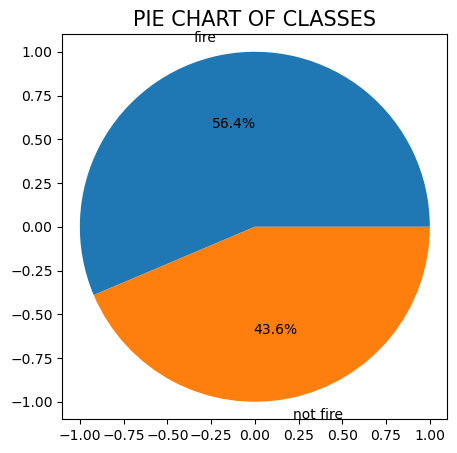

In [36]:
#plotting pie charts
plt.figure(figsize=(5,5))
plt.title("PIE CHART OF CLASSES",fontsize=15)
labels_classes=["fire",'not fire']
plt.pie(percentage,labels=labels_classes,autopct="%1.1f%%",frame=True,shadow=False,wedgeprops = {'linewidth': 3})

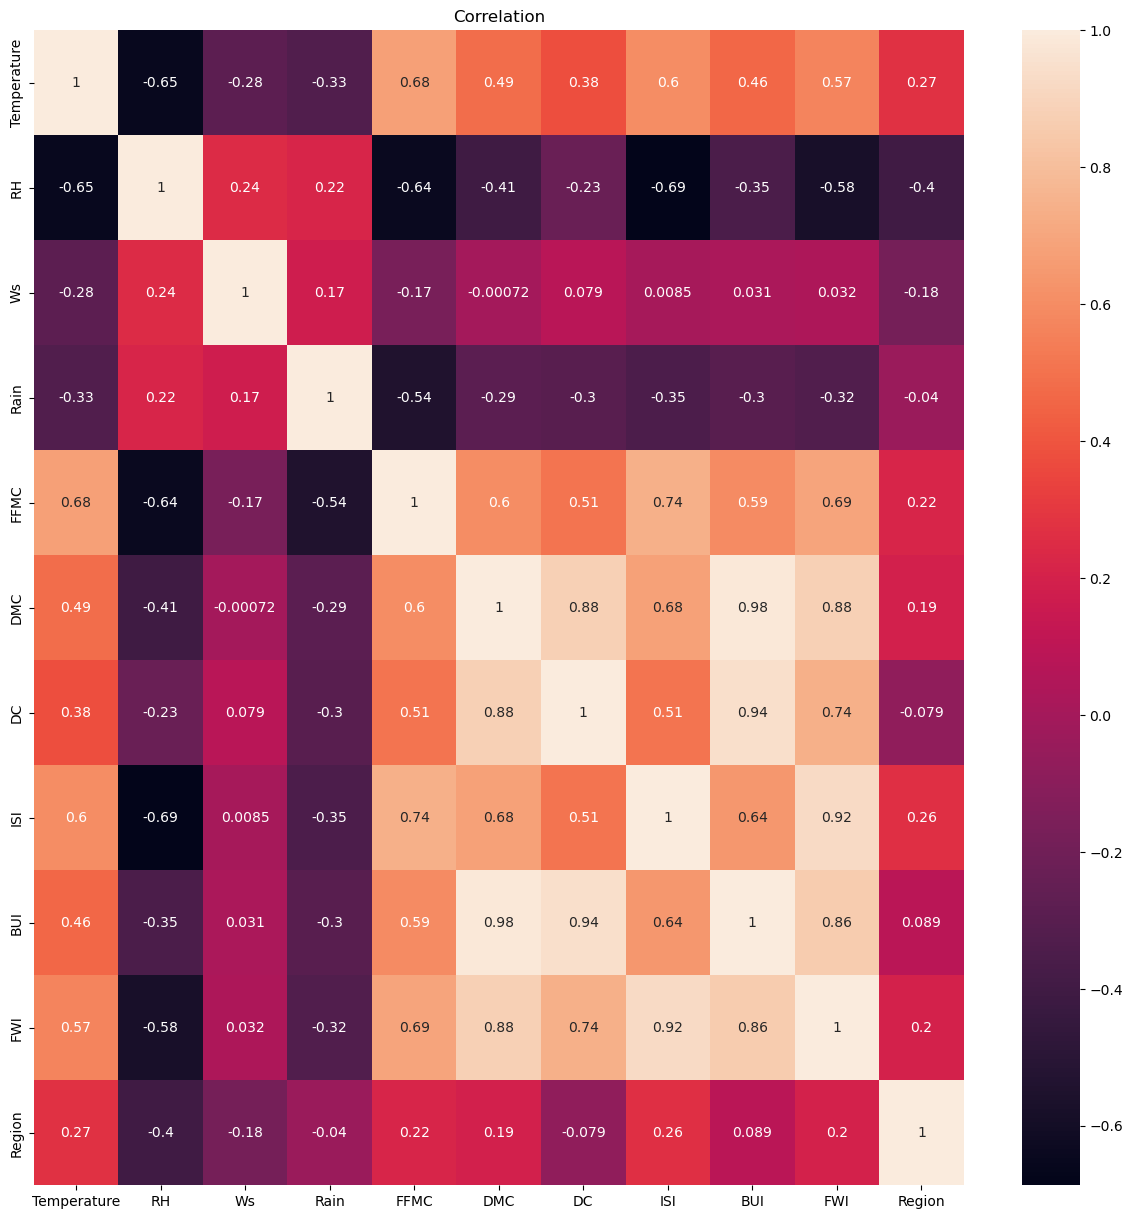

In [37]:
#checking multicollinerity
plt.figure(figsize=(15,15))
plt.title("Correlation")
correl=df_feat.corr().T
sns.heatmap(correl,annot=True,annot_kws={'size':10})
plt.show()

In [66]:
# bar chart of each of category wrt to other
def barchart(feature,x_label):
    plt.figure(figsize=(10,5))
    by_feature=df.groupby([feature], as_index=False)["Classes"].sum()
    sns.barplot(by_feature,x=feature,y="Classes",estimator=sum)
    plt.xlabel(x_label)
    plt.ylabel("fire counts")

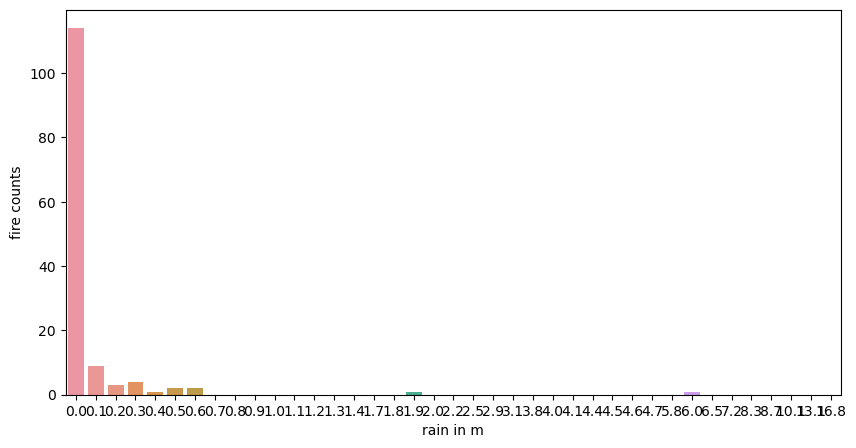

In [67]:
barchart("Rain","rain in m")

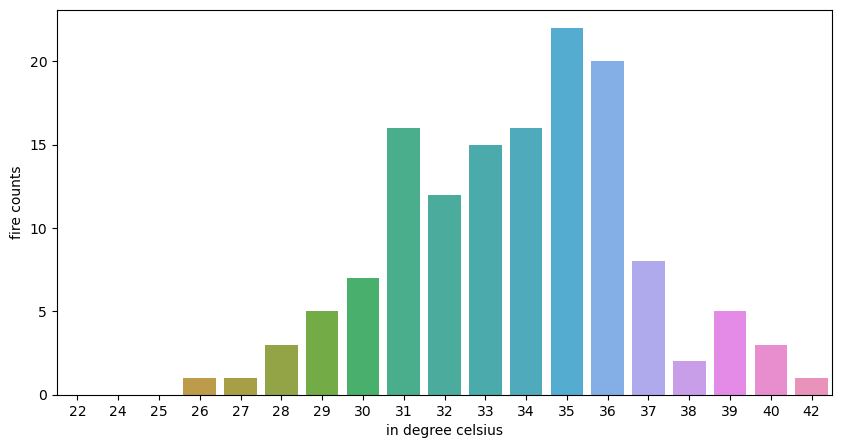

In [68]:
barchart("Temperature","in degree celsius")

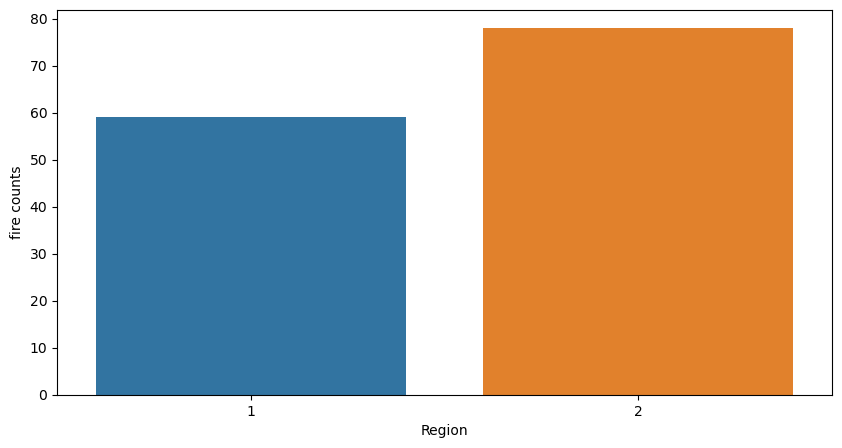

In [69]:
barchart("Region","Region")

In [70]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

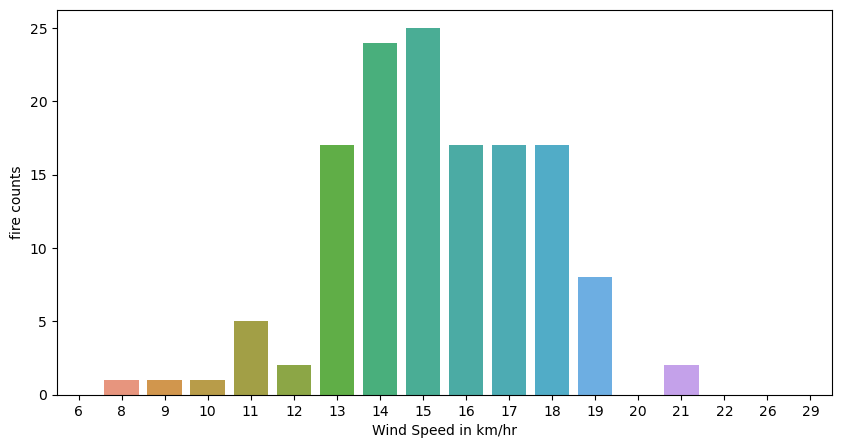

In [71]:
barchart('Ws', 'Wind Speed in km/hr')

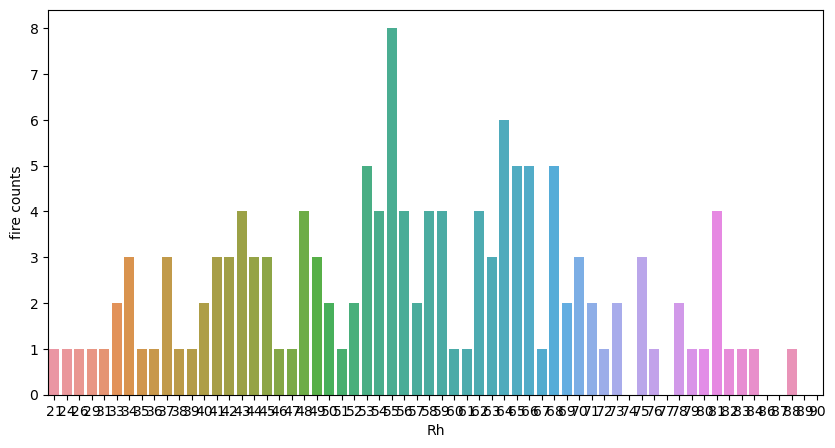

In [72]:
barchart("RH","Rh")